In [27]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import resampy

from tqdm import tqdm
import os

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [16,4] # set figure size#


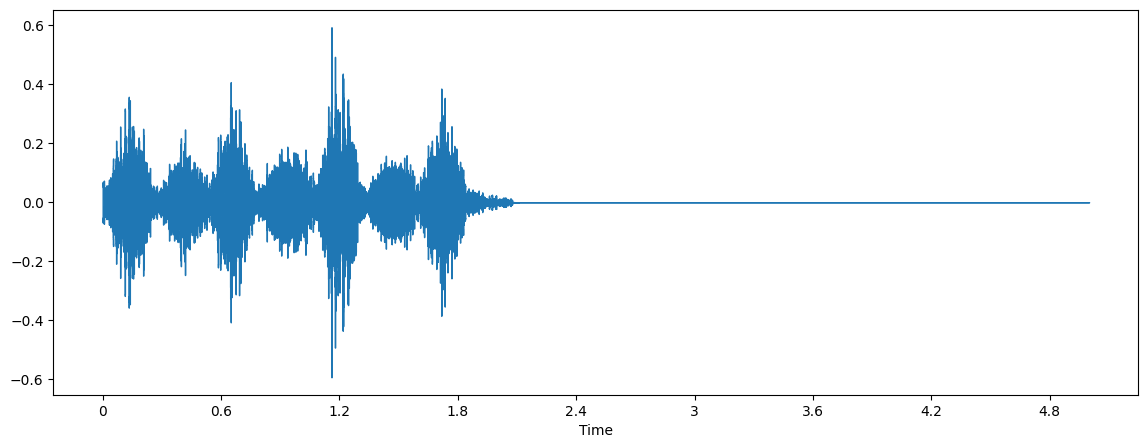

In [28]:
## loading audio file

au1= r'D:\Documents_D\ESC-50-master\ESC-50-master\audio\1-7974-B-49.wav'


plt.figure(figsize=(14,5))
data, sample_rate=librosa.load(au1)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(au1)

In [29]:
data ## librosa also normalize the audio amplitude for each sample 
c=(data.size)/60 ## 60sec is audio length
print(c, sample_rate) # sample rate 

1837.5 22050


## Feature Extration

In [30]:
mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfcc.shape)

(40, 216)


In [31]:


metadata=pd.read_csv('D:\Documents_D\ESC-50-master\ESC-50-master\meta\esc50.csv')

metadata.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [32]:


def features_extractor(file):
    au, sample_rate = librosa.load(file,res_type='kaiser_fast')
    mfcc_features=librosa.feature.mfcc(y=au,sr=sample_rate,n_mfcc=40)
    mfcc_scaled_features=np.mean(mfcc_features.T, axis=0)

    return mfcc_scaled_features

In [33]:
### Now we iterate through every audio file and extract MFCC using metadata csv file with 

## main path of the audio files

audio_dataset_path = r'D:\Documents_D\ESC-50-master\ESC-50-master\audio' 


extracted_features=[] ## store the features and the labels

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(audio_dataset_path, str(row["filename"])) ## very specific to the audio files path
    final_class_labels=row["category"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])



2000it [01:08, 29.19it/s]


In [46]:
## creating the list into dataframe

extracted_features_df=pd.DataFrame(extracted_features,columns=['features','labels'])
extracted_features_df.head()

,features,labels
0,"[-601.2905, 5.188324, -8.995635, -3.7940917, -...",dog
1,"[-199.9886, 11.223685, -67.78312, 12.683219, -...",chirping_birds
2,"[8.070245, 68.474945, -20.432165, 26.459608, -...",vacuum_cleaner
3,"[9.428114, 66.635605, -18.865862, 25.202356, -...",vacuum_cleaner
4,"[-427.5323, 131.2091, 32.553005, 41.130276, -8...",thunderstorm


In [68]:
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['labels'].tolist())
y

array(['dog', 'chirping_birds', 'vacuum_cleaner', ..., 'footsteps',
       'sheep', 'dog'], dtype='<U16')

In [72]:
### Label Encoding
y1=np.array(pd.get_dummies(y)).astype(int)

y1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y1,test_size=0.2,random_state=0)

In [73]:
y_train.shape

(1600, 50)

## Model development using tensorflow
